In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline

In [2]:
csv = pd.read_csv('metadata.csv')

/home/dwight/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (23,25,26,32,34,46,47,52,54,55,60,81,92,96,97,98,100,108,111,113,118,125,133,135,137,141,142,144,149,152,156,158,165,167,170,174,177,182,188,189,190,194,207,208,209,212,218,233,234,239,243,245,248,249,253,254,263,265,271,273,280,282,285,287,290,291,298,302,304,315,316,319,322,330,335,344,348,350,351,355,356,358,360,365,375,381,383,384,388,389,393,394,397,398,402,403,408,409,413,415,417,421,422,431,433,435,440,441,446,447,450,456,458,459,461,462,475,476,478,481,484,490,495,503,504,507,510,512,514,516,519,521,522,527,528,532,546,547,550,552,553,554,564,568,571,575,578,587,592,593,594,598,600,601,605,610,617,622,625,628,630,632,635,636,637,642,643,648,651,657,658,659,661,663,664,666,672,674,675,677,681,683,684,686,689,690,692,694,696,698,699,702,706,710,716,717,718,720,724,726,730,734,736,738,746,747,750,751,752,756,759,763,767,777,780,781,782,786,788,789,790,793,796,798,800,80

In [3]:
csv.set_index("Unnamed: 0")

,UNRATE,CPIAUCSL,FEDFUNDS,CSUSHPINSA,M2SL,M1SL,PSAVERT,PAYEMS,INDPRO,TB3MS,...,LAUCN310910000000004,LAUCN271470000000004,LFWATTFECAM647N,LFWA25TTCLM647N,LFWA55FECAM647S,LFWA55FEKRM647S,LFWA55MAAUM647N,LFWA55MAAUM647S,LFWA55MACLM647N,LFWA55MACLM647S
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
id,UNRATE,CPIAUCSL,FEDFUNDS,CSUSHPINSA,M2SL,M1SL,PSAVERT,PAYEMS,INDPRO,TB3MS,...,LAUCN310910000000004,LAUCN271470000000004,LFWATTFECAM647N,LFWA25TTCLM647N,LFWA55FECAM647S,LFWA55FEKRM647S,LFWA55MAAUM647N,LFWA55MAAUM647S,LFWA55MACLM647N,LFWA55MACLM647S
notes,The unemployment rate represents the number of...,The Consumer Price Index for All Urban Consume...,Averages of daily figures. For additional h...,"For more information regarding the index, plea...","Before May 2020, M2 consists of M1 plus (1) sa...","Before May 2020, M1 consists of (1) currency o...",BEA Account Code: A072RC Personal saving as a ...,"All Employees: Total Nonfarm, commonly known a...",The Industrial Production Index (INDPRO) is an...,"Averages of Business Days, Discount Basis",...,These data come from the Current Population Su...,These data come from the Current Population Su...,OECD descriptor ID: LFWATTFE OECD unit ID: ST ...,OECD descriptor ID: LFWA25TT OECD unit ID: ST ...,OECD descriptor ID: LFWA55FE OECD unit ID: STS...,OECD descriptor ID: LFWA55FE OECD unit ID: STS...,OECD descriptor ID: LFWA55MA OECD unit ID: ST ...,OECD descriptor ID: LFWA55MA OECD unit ID: STS...,OECD descriptor ID: LFWA55MA OECD unit ID: ST ...,OECD descriptor ID: LFWA55MA OECD unit ID: STS...
popularity,98,98,96,90,90,89,87,86,85,82,...,0,0,0,0,0,0,0,0,1,0
title,Unemployment Rate,Consumer Price Index for All Urban Consumers: ...,Effective Federal Funds Rate,S&P/Case-Shiller U.S. National Home Price Index,M2 Money Stock,M1 Money Stock,Personal Saving Rate,"All Employees, Total Nonfarm",Industrial Production: Total Index,3-Month Treasury Bill: Secondary Market Rate,...,"Unemployed Persons in Hooker County, NE","Unemployed Persons in Steele County, MN",Working Age Population: Aged 15 and Over: Fema...,Working Age Population: Aged 25-54: All Person...,Working Age Population: Aged 55-64: Females fo...,Working Age Population: Aged 55-64: Females fo...,Working Age Population: Aged 55-64: Males for ...,Working Age Population: Aged 55-64: Males for ...,Working Age Population: Aged 55-64: Males for ...,Working Age Population: Aged 55-64: Males for ...
units,Percent,Index 1982-1984=100,Percent,Index Jan 2000=100,Billions of Dollars,Billions of Dollars,Percent,Thousands of Persons,Index 2017=100,Percent,...,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons


In [4]:
csv2 = csv.T
csv2.columns = csv["Unnamed: 0"]

In [5]:
df = csv2.drop("Unnamed: 0")
df

Unnamed: 0,frequency,id,notes,popularity,title,units
UNRATE,Monthly,UNRATE,The unemployment rate represents the number of...,98,Unemployment Rate,Percent
CPIAUCSL,Monthly,CPIAUCSL,The Consumer Price Index for All Urban Consume...,98,Consumer Price Index for All Urban Consumers: ...,Index 1982-1984=100
FEDFUNDS,Monthly,FEDFUNDS,Averages of daily figures. For additional h...,96,Effective Federal Funds Rate,Percent
CSUSHPINSA,Monthly,CSUSHPINSA,"For more information regarding the index, plea...",90,S&P/Case-Shiller U.S. National Home Price Index,Index Jan 2000=100
M2SL,Monthly,M2SL,"Before May 2020, M2 consists of M1 plus (1) sa...",90,M2 Money Stock,Billions of Dollars
...,...,...,...,...,...,...
LFWA55FEKRM647S,Monthly,LFWA55FEKRM647S,OECD descriptor ID: LFWA55FE OECD unit ID: STS...,0,Working Age Population: Aged 55-64: Females fo...,Persons
LFWA55MAAUM647N,Monthly,LFWA55MAAUM647N,OECD descriptor ID: LFWA55MA OECD unit ID: ST ...,0,Working Age Population: Aged 55-64: Males for ...,Persons
LFWA55MAAUM647S,Monthly,LFWA55MAAUM647S,OECD descriptor ID: LFWA55MA OECD unit ID: STS...,0,Working Age Population: Aged 55-64: Males for ...,Persons
LFWA55MACLM647N,Monthly,LFWA55MACLM647N,OECD descriptor ID: LFWA55MA OECD unit ID: ST ...,1,Working Age Population: Aged 55-64: Males for ...,Persons


In [6]:
desc = df["title"].astype("string").values
desc

<StringArray>
[                                                           'Unemployment Rate',
 'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
                                                 'Effective Federal Funds Rate',
                              'S&P/Case-Shiller U.S. National Home Price Index',
                                                               'M2 Money Stock',
                                                               'M1 Money Stock',
                                                         'Personal Saving Rate',
                                                 'All Employees, Total Nonfarm',
                                           'Industrial Production: Total Index',
                                 '3-Month Treasury Bill: Secondary Market Rate',
 ...
                                      'Unemployed Persons in Hooker County, NE',
                                      'Unemployed Persons in Steele County, MN',
         

In [8]:
wordcloud = WordCloud().generate(' '.join(desc))

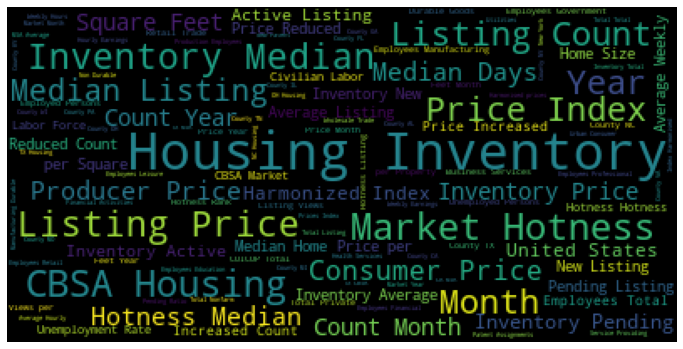

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [9]:
word_features = vectorizer.get_feature_names()
word_features[550:575]

['ammo',
 'ammonia',
 'ammonium',
 'ammunition',
 'amoskeag',
 'amounts',
 'amplifier',
 'amplifiers',
 'amplitude',
 'amsterdam',
 'amusement',
 'amusements',
 'ana',
 'anacortes',
 'anaheim',
 'analgesics',
 'analog',
 'analysis',
 'analytical',
 'analyzers',
 'analyzing',
 'anchorage',
 'anderson',
 'andorra',
 'andrew']

In [10]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]


In [11]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

/home/dwight/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['aa',
 'aaa',
 'abbevill',
 'aberdeen',
 'abilen',
 'abov',
 'abras',
 'abroad',
 'absolut',
 'absorb',
 'abus',
 'academ',
 'acadia',
 'accept',
 'acceptanc',
 'access',
 'accessori',
 'accident',
 'accomack',
 'accommod',
 'account',
 'accrual',
 'accumul',
 'ace',
 'acet',
 'acetylen',
 'acid',
 'acn',
 'acoust',
 'acquisit',
 'act',
 'action',
 'activ',
 'actual',
 'actuat',
 'acycl',
 'ad',
 'ada',
 'adair',
 'adam',
 'addison',
 'addit',
 'address',
 'addresse',
 'ade',
 'adhes',
 'adjunct',
 'adjust',
 'admin',
 'administ']

In [12]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

In [37]:
kmeans = KMeans(n_clusters = 60, n_init = 5, n_jobs = -1)
kmeans.fit(X3)


/home/dwight/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=60, n_init=5, n_jobs=-1)

In [38]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : provid, servic, employe, msa, privat, tx, md, ca, necta, fl
1 : increas, price, inventori, hous, count, cbsa, averag, list, counti, tx
2 : month, reduc, count, price, inventori, hous, cbsa, counti, tx, oh
3 : hot, rank, market, counti, nielsen, household, cbsa, tx, nc, oh
4 : year, pend, ratio, inventori, hous, counti, count, list, cbsa, tx
5 : produc, good, econom, index, domest, activ, price, type, employe, msa
6 : rate, unemploy, counti, msa, tx, ga, yrs, va, ky, mo
7 : patent, assign, new, counti, tx, va, ga, ky, ia, mo
8 : list, median, price, inventori, hous, feet, squar, year, counti, cbsa
9 : inform, employe, discontinu, unit, msa, state, texa, report, m, index
10 : produc, index, industri, commod, price, product, manufactur, equip, metal, discontinu
11 : person, unemploy, counti, tx, msa, ga, va, ky, ks, mo
12 : util, transport, employe, trade, wareh, msa, averag, week, hour, earn
13 : alcohol, beverag, total, consum, tobacco, coicop, index, price, narcot, food
14 : employ

In [39]:
Counter(kmeans.labels_).most_common()

[(27, 10637),
 (10, 10613),
 (9, 10046),
 (18, 9629),
 (36, 7824),
 (50, 6889),
 (8, 6844),
 (17, 6489),
 (40, 6327),
 (37, 5982),
 (3, 5178),
 (26, 5053),
 (6, 4817),
 (53, 4686),
 (41, 4607),
 (21, 4036),
 (56, 4015),
 (4, 3945),
 (24, 3922),
 (22, 3875),
 (16, 3873),
 (14, 3777),
 (11, 3751),
 (25, 3502),
 (43, 3421),
 (44, 3362),
 (20, 3293),
 (12, 3052),
 (35, 2949),
 (5, 2911),
 (0, 2835),
 (1, 2835),
 (54, 2791),
 (29, 2728),
 (57, 2592),
 (30, 2589),
 (32, 2589),
 (7, 2291),
 (33, 2222),
 (59, 2075),
 (49, 1962),
 (48, 1962),
 (51, 1961),
 (2, 1961),
 (39, 1944),
 (58, 1794),
 (46, 1741),
 (55, 1692),
 (47, 1648),
 (19, 1590),
 (52, 1407),
 (45, 1404),
 (42, 1295),
 (38, 1038),
 (31, 1000),
 (28, 980),
 (13, 970),
 (23, 833),
 (34, 725),
 (15, 388)]

In [42]:
index = list(np.where(kmeans.labels_==15)[0])

In [43]:
df.iloc[index]

Unnamed: 0,frequency,id,notes,popularity,title,units
SMS26476640000000001,Monthly,SMS26476640000000001,NaN,1,All Employees: Total Nonfarm in Warren-Troy-Fa...,Thousands of Persons
SMU26476646000000001,Monthly,SMU26476646000000001,NaN,1,All Employees: Professional and Business Servi...,Thousands of Persons
SMS26476640000000026,Monthly,SMS26476640000000026,NaN,1,All Employees: Total Nonfarm in Warren-Troy-Fa...,"3-Month Average Change, Thousands of Persons"
SMU26476640700000001SA,Monthly,SMU26476640700000001SA,The Federal Reserve Bank of St. Louis seasonal...,1,All Employees: Service-Providing in Warren-Tro...,Thousands of Persons
SMU26476646056130001SA,Monthly,SMU26476646056130001SA,The Federal Reserve Bank of St. Louis seasonal...,1,All Employees: Professional and Business Servi...,Thousands of Persons
...,...,...,...,...,...,...
SMU26476646054000030,Monthly,SMU26476646054000030,NaN,0,Average Weekly Earnings of Production Employee...,Dollars per Week
SMU26476643100000001SA,Monthly,SMU26476643100000001SA,The Federal Reserve Bank of St. Louis seasonal...,0,All Employees: Manufacturing: Durable Goods in...,Thousands of Persons
SMU26476440800000001SA,Monthly,SMU26476440800000001SA,The Federal Reserve Bank of St. Louis seasonal...,0,All Employees: Private Service Providing in Wa...,Thousands of Persons
SMU26476644100000001SA,Monthly,SMU26476644100000001SA,The Federal Reserve Bank of St. Louis seasonal...,0,All Employees: Wholesale Trade in Warren-Troy-...,Thousands of Persons
